In [18]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import pandas as pd

df = pd.read_csv("sales_train.csv")
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [20]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [21]:
df.shop_id.unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36])

In [22]:
null_values = df.isnull().sum()
negative_values = (df[['item_price', 'item_cnt_day']] < 0).sum()
print(null_values)


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [23]:
print(negative_values)

item_price         1
item_cnt_day    7356
dtype: int64


In [24]:
df[df['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [25]:
df[df['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [26]:
df.shape

(2935849, 6)

In [27]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [28]:
df = df[df['item_price'] < 100000]
df = df[df['item_cnt_day'] < 1001]

In [29]:
df.shape

(2935847, 6)

In [30]:
train = df
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [31]:
train['value'] = train['item_price'] * train['item_cnt_day']
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


<Axes: xlabel='date_block_num'>

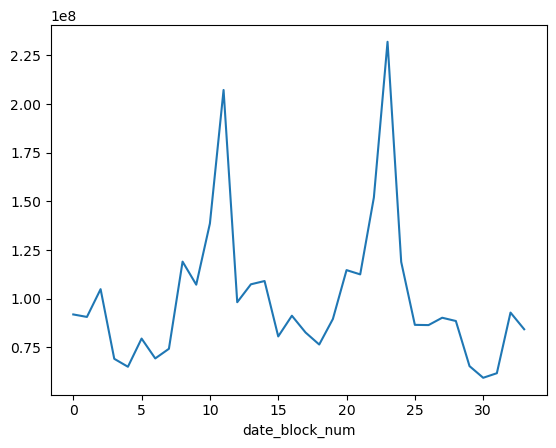

In [32]:
train.groupby('date_block_num')['value'].sum().plot()

In [33]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


In [ ]:
price_95th_percentile = train['item_price'].quantile(0.95)
train = train[train['item_price'] <= price_95th_percentile]

In [35]:
train = train[train['item_cnt_day'] >= 0]
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
5,2013-01-10,0,25,2564,349.00,1.0,349.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


<Axes: xlabel='date_block_num'>

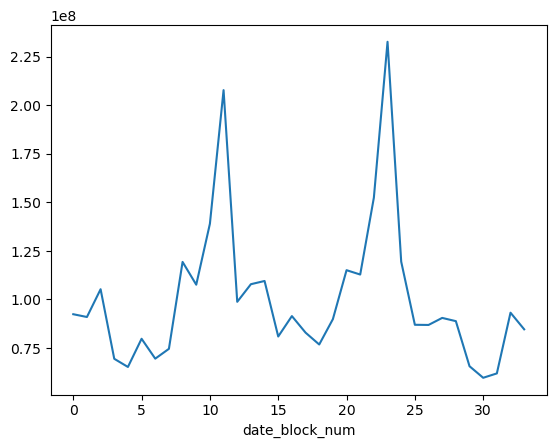

In [36]:
train.groupby('date_block_num')['value'].sum().plot()

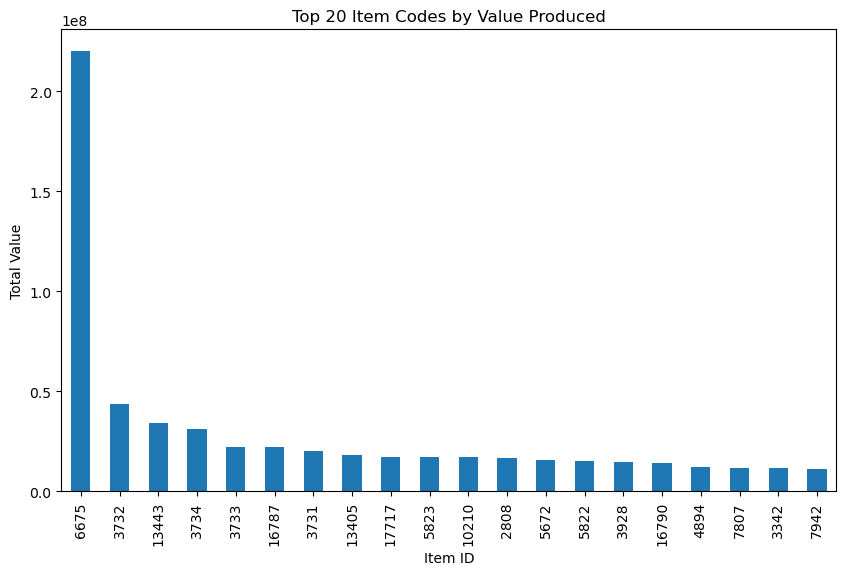

In [37]:
top_items = train.groupby('item_id')['value'].sum().sort_values(ascending=False).head(20)
top_items.plot(kind='bar', figsize=(10, 6), title='Top 20 Item Codes by Value Produced')
plt.xlabel('Item ID')
plt.ylabel('Total Value')
plt.show()

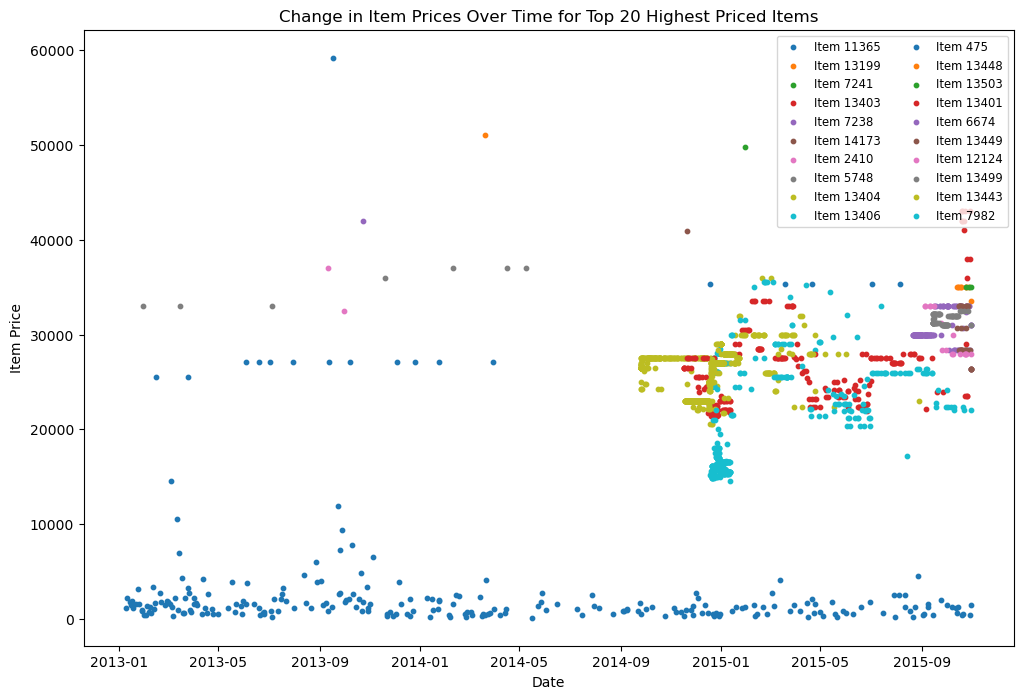

In [39]:
# Get the top 20 highest priced items
top_20_items = train.groupby('item_id')['item_price'].max().sort_values(ascending=False).head(20).index

# Filter the dataset for these items
top_20_data = train[train['item_id'].isin(top_20_items)]

# Plot the change in item prices over time as a scatter plot
plt.figure(figsize=(12, 8))
for item_id in top_20_items:
    item_data = top_20_data[top_20_data['item_id'] == item_id]
    plt.scatter(item_data['date'], item_data['item_price'], label=f'Item {item_id}', s=10)  # Use scatter plot

plt.title('Change in Item Prices Over Time for Top 20 Highest Priced Items')
plt.xlabel('Date')
plt.ylabel('Item Price')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.show()

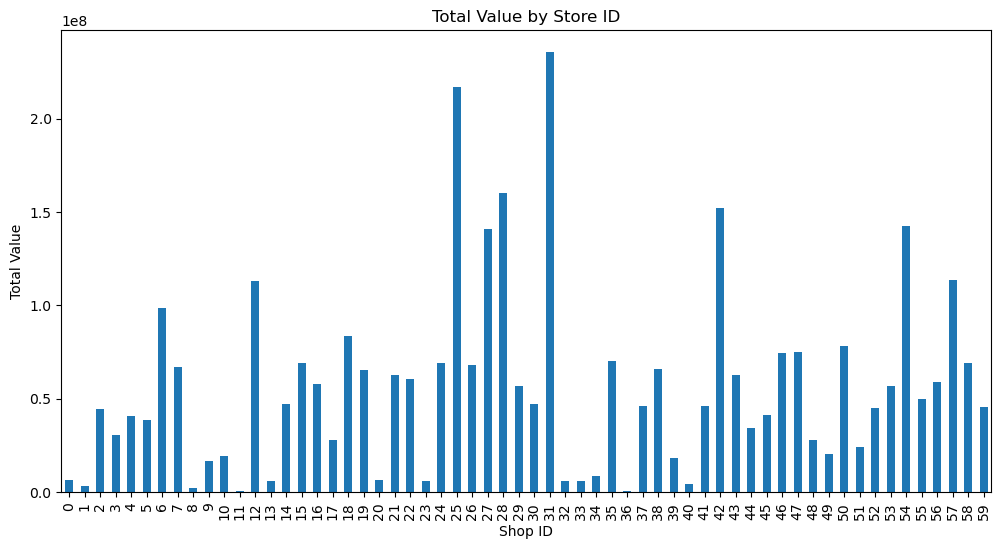

In [40]:
train.groupby('shop_id')['value'].sum().plot(kind='bar', figsize=(12, 6), title='Total Value by Store ID')
plt.xlabel('Shop ID')
plt.ylabel('Total Value')
plt.show()